# Thông Tin
1. MSSV: 20520800
2. Họ và tên: Đặng Anh Tiến
3. Bài tập: Bài tập 4
4. Ngày thực hiện: 19/10/2021

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip install fuzzy-c-means

In [ ]:
DATA_DIR = '/gdrive/MyDrive/CS231.M11/Baitap/Baitap4/images'

In [ ]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils
from imutils import opencv2matplotlib
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from fcmeans import FCM
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [ ]:
def TinhHist(pathfilename):
  img = cv.imread(pathfilename,0)
  hist = cv.calcHist([img],[0],None,[256],[0,256])
  size = img.shape[0]*img.shape[1]
  hist = hist / size
  return hist

In [ ]:
def showHist(pathfilename):
  img_authentic = cv.imread(pathfilename, 0)
  img = img_authentic.copy()
  hist = cv.calcHist([img],[0],None,[256],[0,256])

  plt.figure(figsize = (14, 7))

  plt.subplot(1,2,1)
  plt.imshow(img_authentic, cmap='gray')
  plt.title("Origin Image")

  plt.subplot(1,2,2)
  plt.plot(hist)
  plt.title("Image Histogram")
  plt.xlim([0,256])
  plt.legend(('Histogram'),loc = 'upper left')
  plt.show()

In [ ]:
def global_thres(img_authentic, thres):
  img = img_authentic.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] > thres:
        img[i][j] = 0
      else:
        img[i][j] = 255
  
  return img

In [ ]:
def show_img_glob_thres(pathfilename, thres):
  img_authentic = cv.imread(pathfilename, 0)

  img = global_thres(img_authentic, thres)

  plt.figure(figsize=(14, 7))
  plt.subplot(1,2,1)
  plt.imshow(img_authentic, cmap = 'gray')
  plt.title("Origin Image")

  plt.subplot(1,2,2)
  plt.imshow(img, cmap = 'gray')
  plt.title("Image Segmented")

In [ ]:
def adaptive_thres(pathfilename, nrow, ncol, showImage = 0):
  img_authentic = cv.imread(pathfilename, 0)
  img = img_authentic.copy()

  r = int(img.shape[0] / nrow)
  c = int(img.shape[1] / ncol)

  for i in range(nrow):
    for j in range(ncol):
      img_child = img_authentic[ (i * r) : ((i + 1) * r) , (j * c) : ((j + 1) * c) ]
      mean = np.average(img_child)
      img[ (i * r) : ((i + 1) * r) , (j * c) : ((j + 1) * c) ] = global_thres(img_child, mean)
  
  if showImage == 0:
    return img
  else:
    plt.figure(figsize=(14, 7))
    plt.subplot(1,2,1)
    plt.imshow(img_authentic, cmap = 'gray')
    plt.title("Origin Image")

    plt.subplot(1,2,2)
    plt.imshow(img, cmap = 'gray')
    plt.title("Image Segmented")

In [ ]:
def k_means_on_image(pathfilename, n_cluster):
  img_authentic = cv.imread(pathfilename)
  r,c,ch = img_authentic.shape
  img = img_authentic.reshape(r*c, ch)

  k_means = KMeans(n_clusters=n_cluster, random_state = 42)
  k_means.fit(img)

  t = k_means.cluster_centers_[k_means.labels_]
  final_img = t.reshape(r, c, ch)
  final_img = final_img.astype(np.uint8)

  plt.figure(figsize=(14, 7))

  plt.subplot(1,2,1)
  plt.imshow(opencv2matplotlib(img_authentic))
  plt.title("Origin Image")

  plt.subplot(1,2,2)
  plt.imshow(opencv2matplotlib(final_img))
  plt.title("Image Segmented")

In [ ]:
# 1->K Means
# 2-> MeanShift
# 3->FCM
def Segmentation(pathfilename, k=10, coor=True, option = 1):
  img = cv.imread(pathfilename)
  nrow, ncol,nchl = img.shape

  g = []

  if coor == False:
    g   = img.reshape(nrow*ncol,nchl)
  else:
    for i in range(nrow):
      for j in range(ncol):
        temp = [img[i][j][0], img[i][j][1], img[i][j][2], i, j]
        g.append(temp)
  g = np.array(g)

  if option == 1:
    k_means = KMeans(n_clusters = k, random_state = 0).fit(g)
    tt = k_means.cluster_centers_[k_means.labels_]
    t = tt[:,0:3]
    img_res = t.reshape(nrow, ncol, nchl)
    img_res = img_res.astype(np.uint8)
    Title = 'K Means'

  if option == 2:
    band = estimate_bandwidth(g, n_samples=1000)
    ms = MeanShift(bandwidth=band, bin_seeding= True)
    ms.fit(g)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    tt = cluster_centers[labels]
    t = tt[:,0:3]
    img_res = t.reshape(nrow, ncol, nchl)
    img_res = img_res.astype(np.uint8)
    Title = 'Mean Shift'

  if option == 3:
    fcm = FCM(n_clusters=k)
    fcm.fit(g)
    fcm_centers = fcm.centers
    fcm_labels = fcm.predict(g)
    tt = fcm_centers[fcm_labels]
    t = tt[:,0:3]
    img_res = t.reshape(nrow, ncol, nchl)
    img_res = img_res.astype(np.uint8)
    Title = 'FCM'

  plt.figure(figsize=(14, 7))

  plt.subplot(1,2,1)
  plt.imshow(opencv2matplotlib(img))
  plt.title("Origin Image")

  plt.subplot(1,2,2)
  plt.imshow(opencv2matplotlib(img_res))
  plt.title("Image Segmented using {}".format(Title))

# Yêu cầu 1:  Chọn ngưỡng: global


1.   particles.bmp
2.   Phandoan01.jpg
3.   wdg2.jpg



In [ ]:
img1_path = 'particles.bmp'
img2_path = 'Phandoan01.jpg'
img3_path = 'wdg2.jpg'

## 1.particles.bmp

### Show Hist

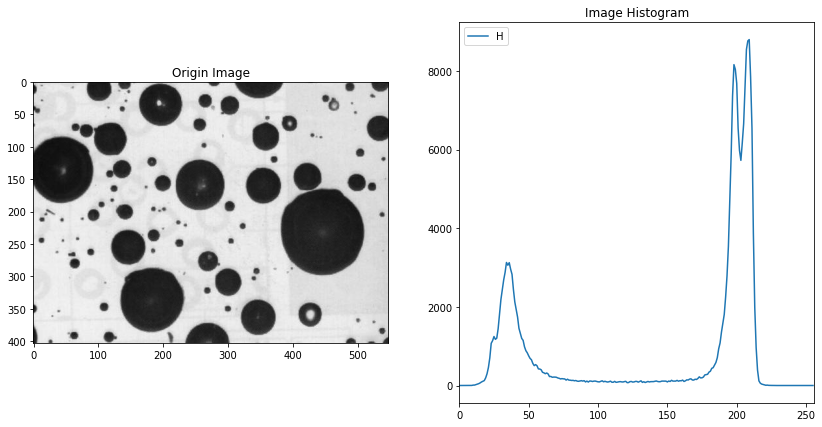

In [ ]:
showHist(os.path.join(DATA_DIR, img1_path))

### Segment

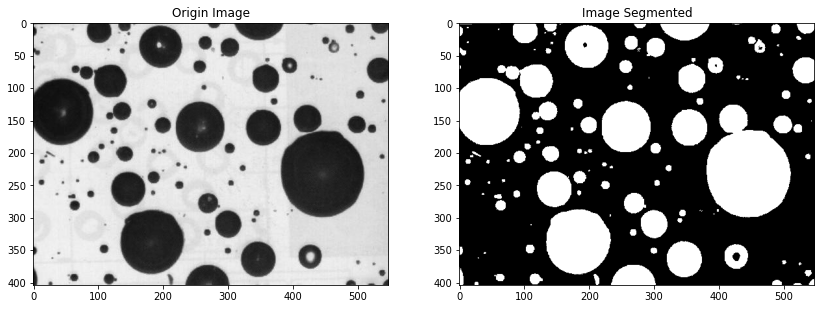

In [ ]:
thres = 150
show_img_glob_thres(os.path.join(DATA_DIR, img1_path), thres = thres)

## 2.Phandoan01.jpg

### Show Hist

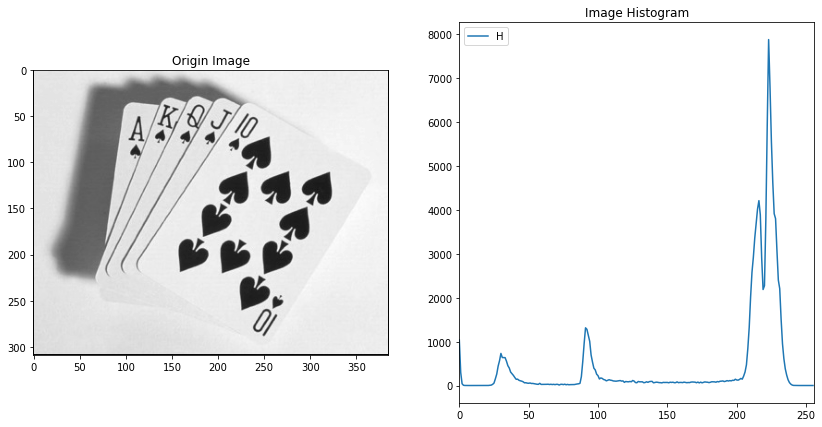

In [ ]:
showHist(os.path.join(DATA_DIR, img2_path))

### Segment

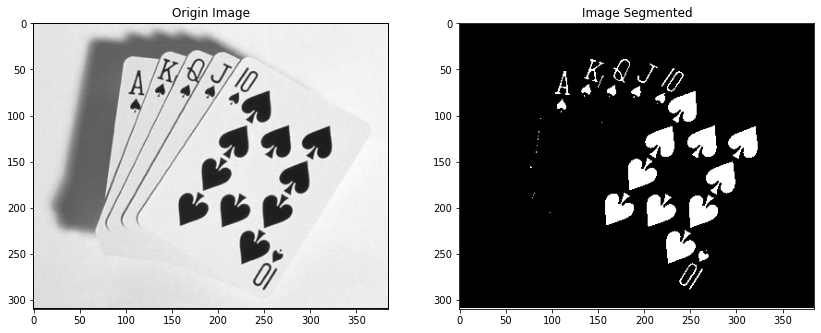

In [ ]:
thres = 85
show_img_glob_thres(os.path.join(DATA_DIR, img2_path), thres = thres)

## 3.wdg2.jpg

### Show Hist

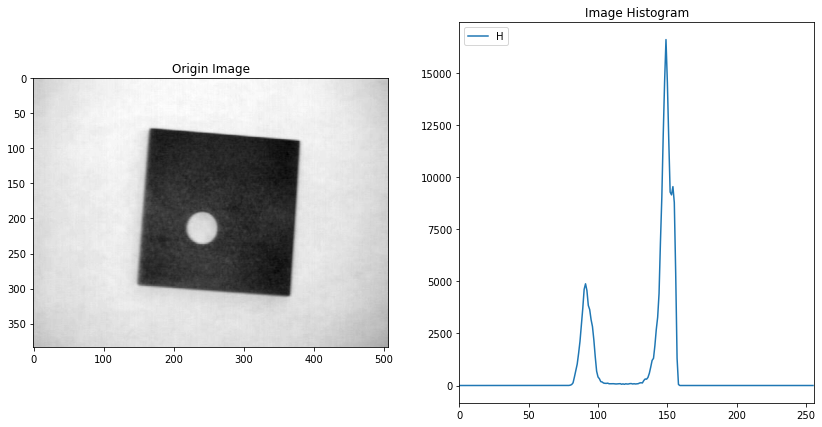

In [ ]:
showHist(os.path.join(DATA_DIR, img3_path))

### Segment

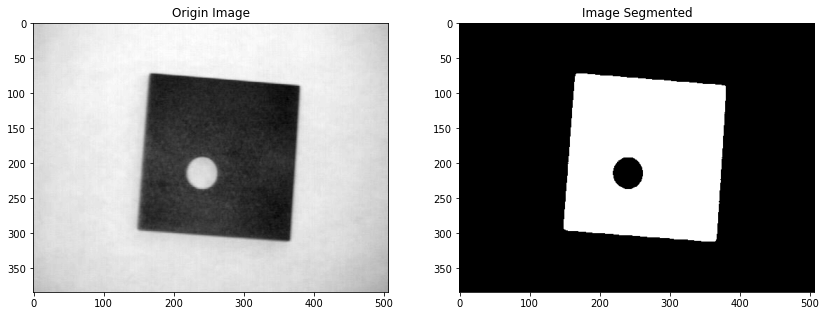

In [ ]:
thres = 125
show_img_glob_thres(os.path.join(DATA_DIR, img3_path), thres = thres)

# Yêu cầu 2: Chọn ngưỡng: Adaptive
1.  Ảnh wdg3.jpg
2.  Hoặc son1.jpg


In [ ]:
img4_path = 'wdg3.jpg'
img5_path = 'son1.jpg'

## 1.wdg3.jpg

### Show Hist

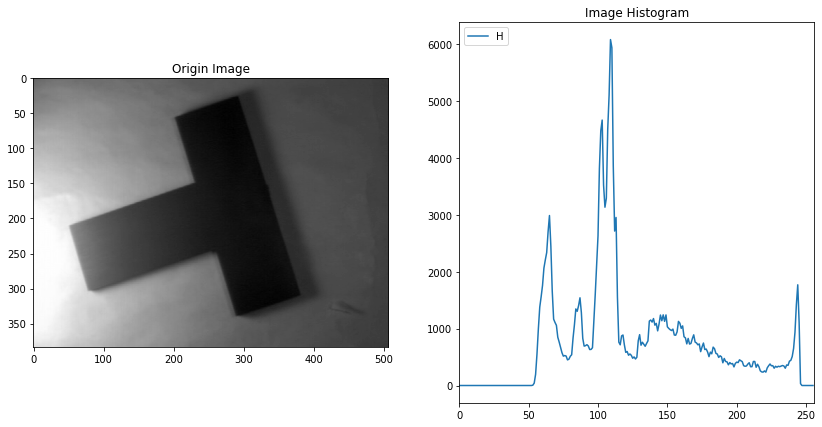

In [ ]:
showHist(os.path.join(DATA_DIR, img4_path))

### Segment

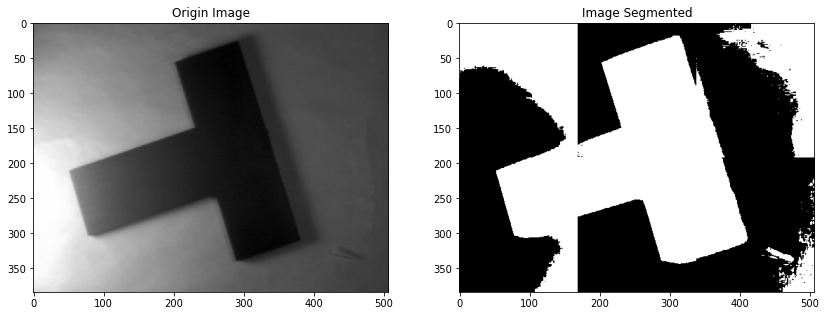

In [ ]:
adaptive_thres(os.path.join(DATA_DIR, img4_path), 2, 3, showImage = 1)

## 2.son1.jpg

### Show Hist

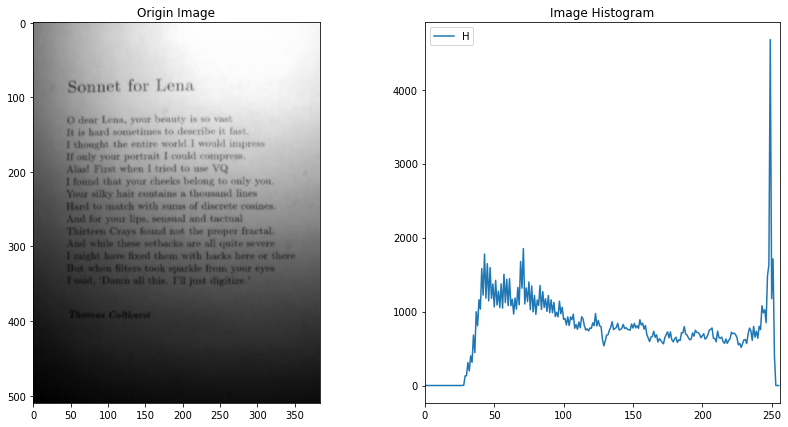

In [ ]:
showHist(os.path.join(DATA_DIR, img5_path))

### Segment

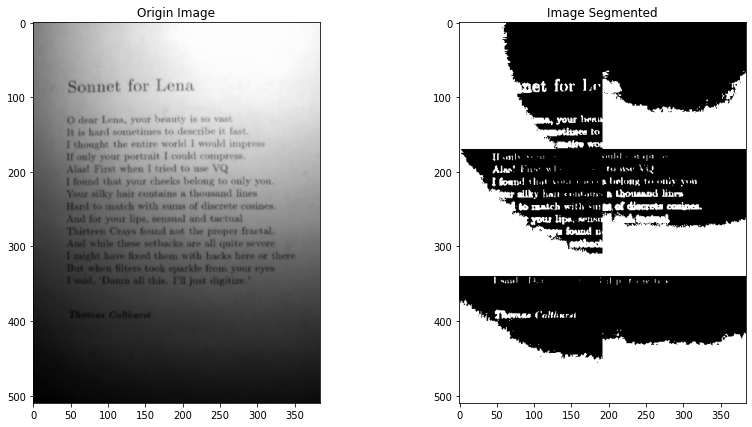

In [ ]:
adaptive_thres(os.path.join(DATA_DIR, img5_path), 3, 2, showImage = 1)

# Yêu cầu 3: Áp dụng thuật toán k-means


In [ ]:
img6_path = 'vegetables.jpg'
img7_path = 'hand.jpg'
img8_path = 'thuoc.jpg '

## Representing each pixel as (r,g,b)

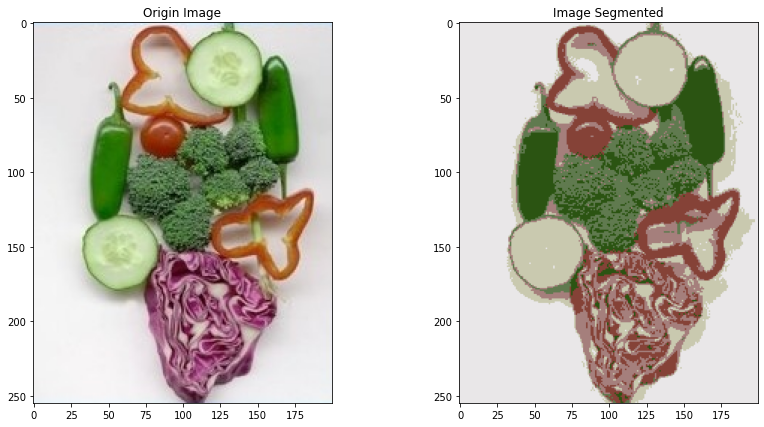

In [ ]:
k_means_on_image(os.path.join(DATA_DIR, img6_path), 6)

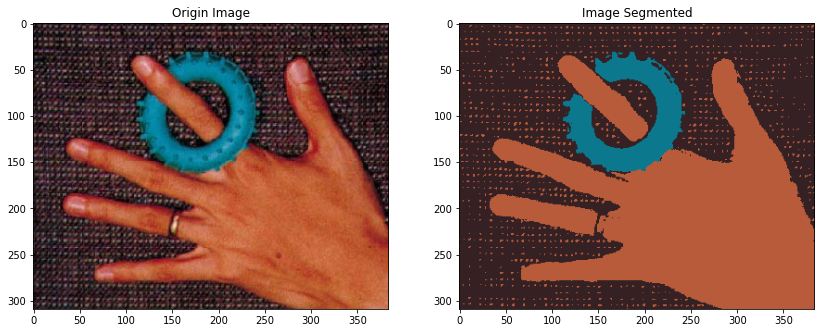

In [ ]:
k_means_on_image(os.path.join(DATA_DIR, img7_path), 3)

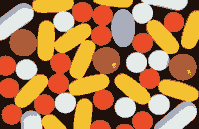

In [ ]:
k_means_on_image(os.path.join(DATA_DIR, 'thuoc.jpg'), 6)

## Represent each pixel as (r,g,b,x,y)

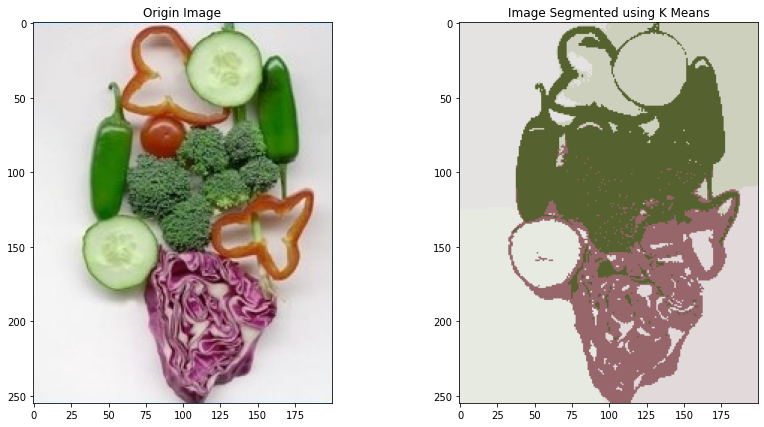

In [ ]:
Segmentation(os.path.join(DATA_DIR, img6_path), k=6, coor=True)

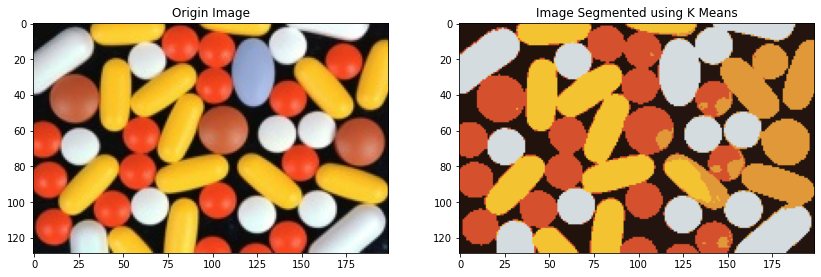

In [ ]:
Segmentation(os.path.join(DATA_DIR, 'thuoc.jpg'), k=6, coor=True)

# Yêu cầu 4: 
Áp dụng Mean Shift và Fuzzy C-Means Clustering (FCM)

## Mean Shift


### Mean Shift using (r,g,b)

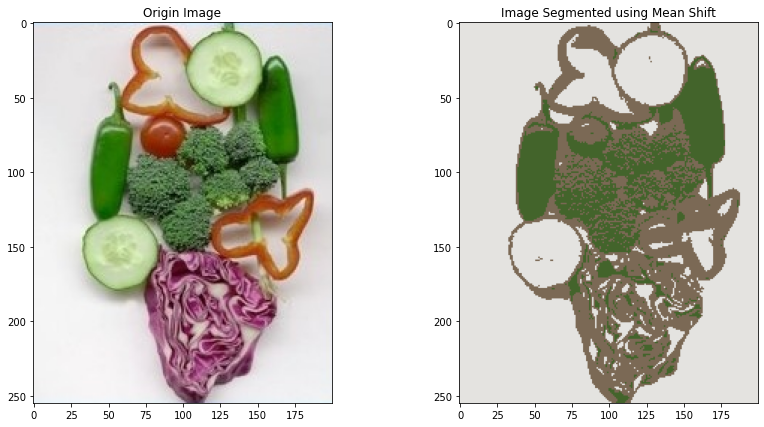

In [ ]:
Segmentation(os.path.join(DATA_DIR, img6_path), k=6, coor=False, option = 2)

### Mean Shift (r,g,b,x,y)

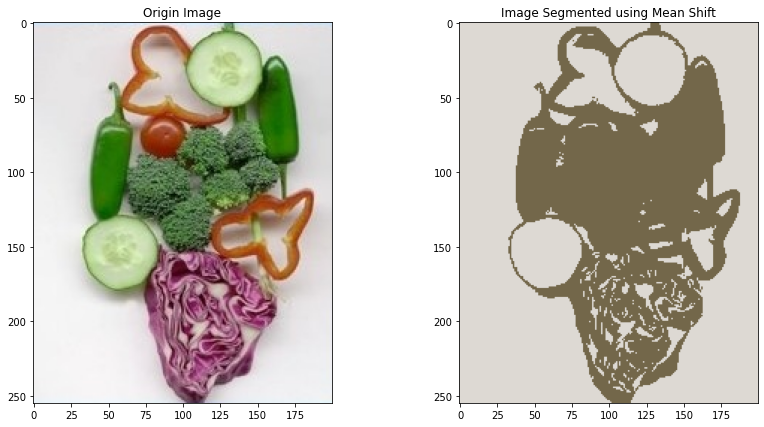

In [ ]:
Segmentation(os.path.join(DATA_DIR, img6_path), k=6, coor=True, option = 2)

## Fuzzy C-Means Clustering

### FCM using (r,g,b)

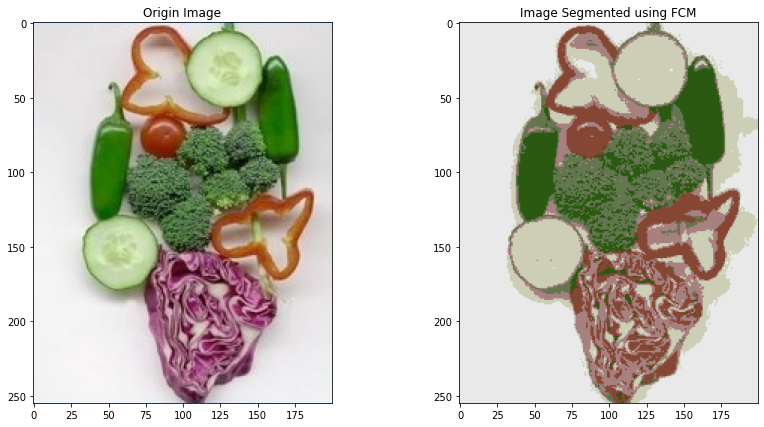

In [ ]:
Segmentation(os.path.join(DATA_DIR, img6_path), k=6, coor=False, option = 3)

### FCM using (r,g,b,x,y)

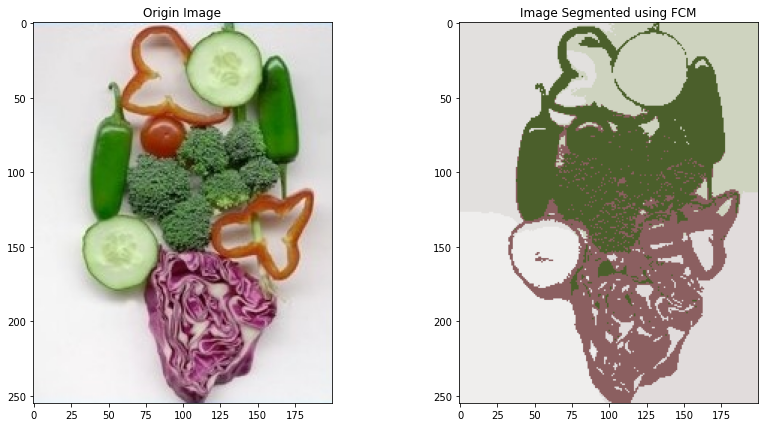

In [ ]:
Segmentation(os.path.join(DATA_DIR, img6_path), k=6, coor=True, option = 3)